# Цифровая обработка сигналов - Лекция 14

# Тема: Кепстр и мел-частотные кепстральные  коэффициенты

## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

## Кепстр

**Кепстр** - результат особого преобразования, получаемого применением обратного преобразования Фурье к логарифму спектра мощности сигнала. По сути кепстр является *спектром от спектра* сигнала. 

Впервые термин "кепстр" был предложен в 1962 в статье Богерт и Хили, заметившими, что спектр имеет периодическую структуру, а значит, для его анализа можно использовать инструменты работы с периодическими сигналами - преобразования Фурье. Слово "кепстр" (от английского cepstrum) является анаграммой слова "спектр" - первые 4 буквы в нем расположены в обратном порядке (<u>*spec*</u>trum => <u>*ceps*</u>trum).

Алгоритм получения кепстра:
1. К сигналу применяется дискретное преобразование Фурье.
2. От полученного спектра мощности сигнала берется логарифм, чтобы получить лог-спектр.
3. К лог-спектру применяется обратное преобразование Фурье. На выходе получается *спектр от спектра* сигнала.

Формально вычисление кепстра сигнала можно записать следующим образом:

$$ С\{x(t)\} = |F^{-1}\{log(|F\{x(t)\}|^2)\}|^2 \tag{14.1}$$

где $F\{\cdot\}$ это прямое преобразование Фурье, а $F^{-1}\{\cdot\}$ - обратное.

Рассмотрим подробнее, как происходит вычисление кепстра. Для этого визуализируем результаты выполнения шагов алгоритма.

In [1]:
import librosa
import librosa.display
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
N = 2048
time = np.arange(N)

timestamps = [0, 700, 1400]
periods = [50, 25, 12]
signal = np.zeros(N)
for timestamp, period in zip(timestamps, periods):
    mask = (time > timestamp) & 1
    cosine = np.cos(2 * np.pi / period * time) * mask
    signal += cosine

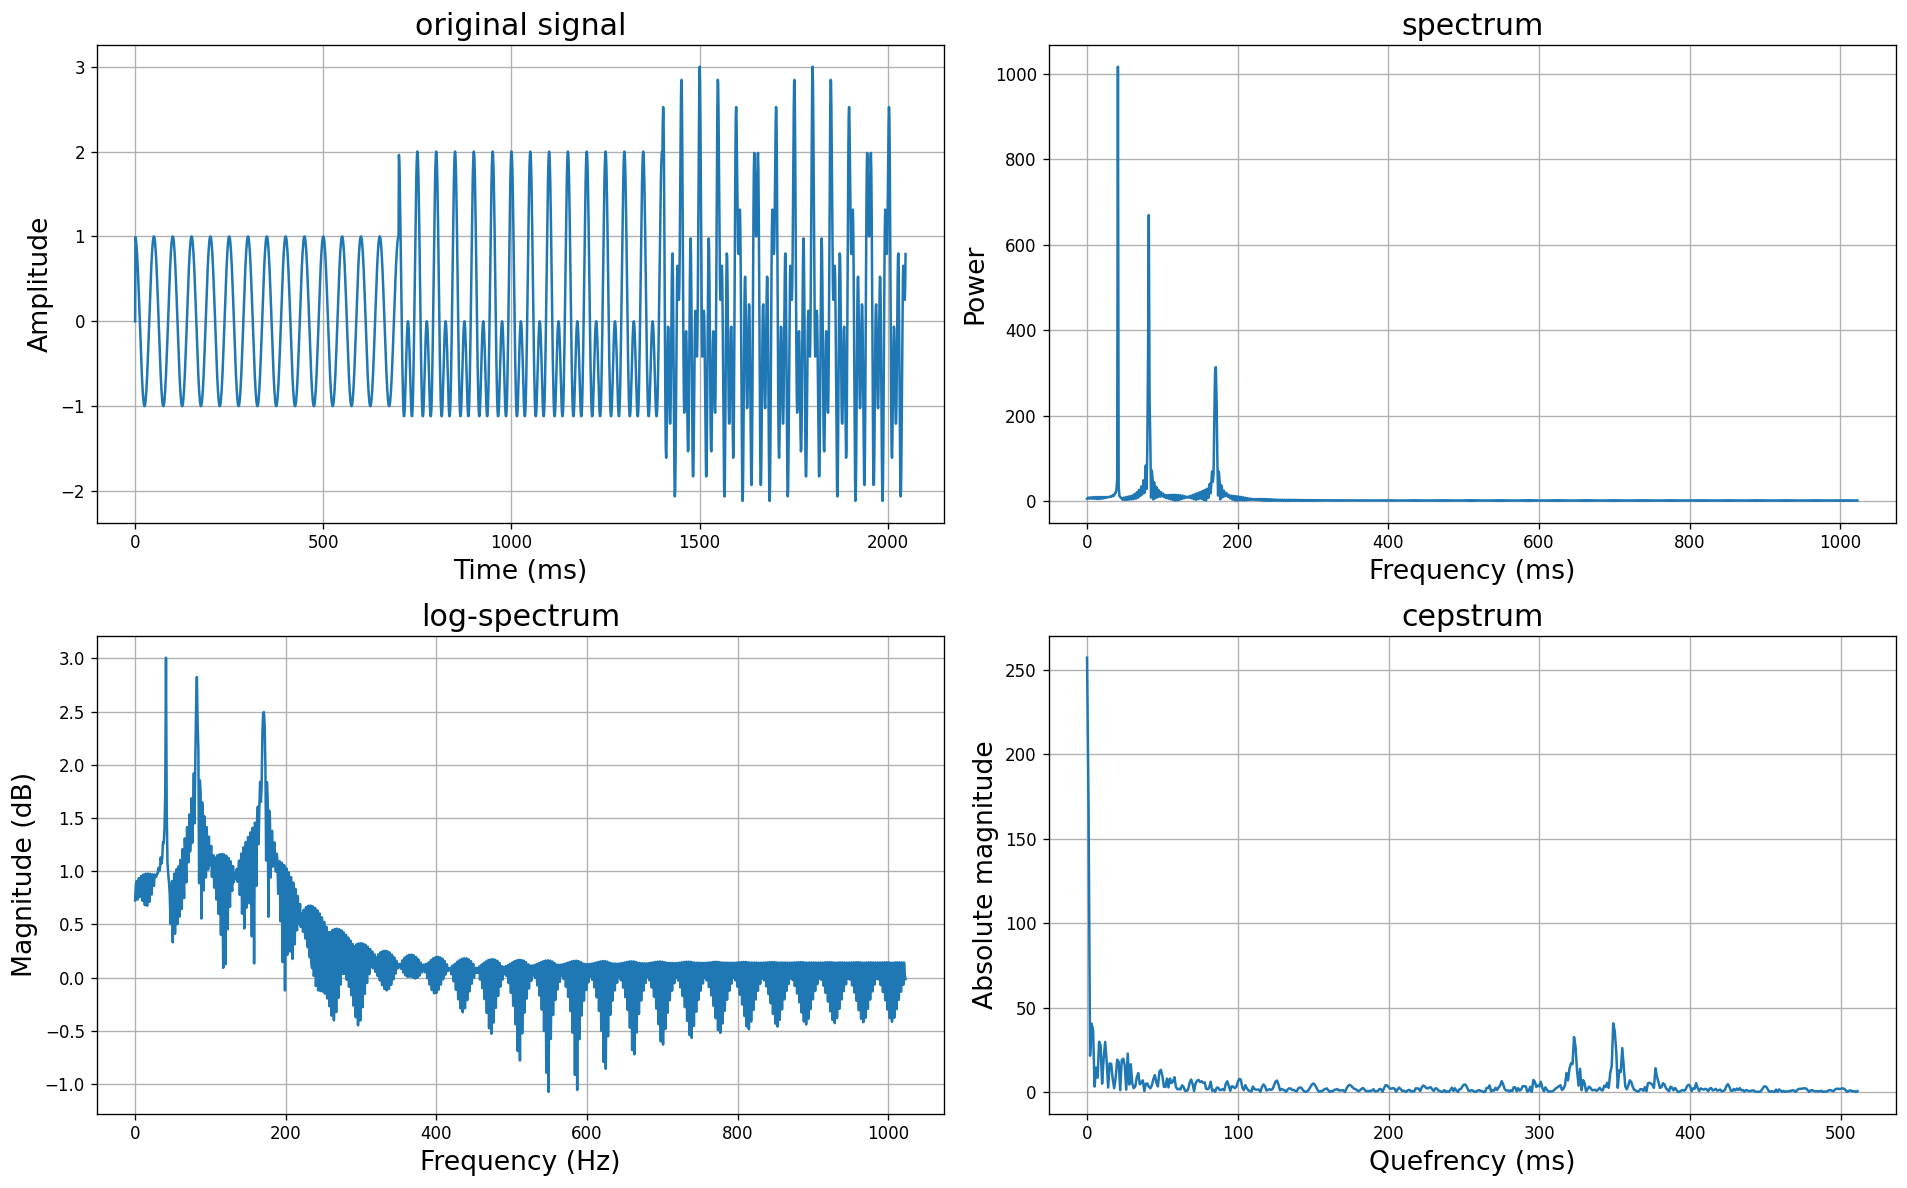

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=120)

# Signal in time-domain
plt.subplot(2, 2, 1)
plt.title('original signal', fontsize=18)
plt.plot(signal)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()


# Compute spectrum
spectrum = np.abs(scipy.fftpack.fft(signal))[:N//2]
plt.subplot(2, 2, 2)
plt.title('spectrum', fontsize=18)
plt.plot(spectrum)
plt.xlabel('Frequency (ms)', fontsize=16)
plt.ylabel('Power', fontsize=16)
plt.grid()


# Compute log-spectrum
log_spectrum = np.log10(spectrum)
plt.subplot(2, 2, 3)
plt.title('log-spectrum', fontsize=18)
plt.plot(log_spectrum)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Magnitude (dB)', fontsize=16)
plt.grid()


# Compute cepstrum
cepstrum = np.abs(np.real(scipy.fft.fft(log_spectrum)))[:N//4]
plt.subplot(2, 2, 4)
plt.title('cepstrum', fontsize=18)
plt.plot(cepstrum)
plt.xlabel('Quefrency (ms)', fontsize=16)
plt.ylabel('Absolute magnitude', fontsize=16)
plt.grid()
plt.tight_layout()

Как можно заметить из графика выше, лог-спектр *имеет периодическую структуру*, и его пики соответствуют основным тонам, присутствующим в сигнале. А это значит, что мы можем воспринимать лог-спектр как *периодический сигнал* и использовать для его анализа инструменты работы с периодическими сигналами.

В этом и заключается основная идея кепстра, изображенного на последнем графике: если в лог-спектре присутствуют периодические компоненты, мы можем применить преобразование Фурье, чтобы проанализировать эти периодические компоненты.

Так как мы считаем обратное преобразование Фурье от спектра, полученный результат не находится ни в частотной, ни во временной области. Авторы решили назвать получившуюся область *quefrency domain* (анаграмма  слова frequency, полученная перестановкой первых 4 букв), чтобы подчеркнуть связь и вместе с тем отличие кепстра от спектра. Поэтому на последнем графике на оси $X$ откладываются не частоты, а quefrency-значения, измеряемые в мс. В русском языке частота кепстра иногда называется *сачтотой*.

## Связь кепстра и речевого аппарата

Чтобы понять, почему кепстр является важным инструментом для анализа речи, рассмотрим, как работает речевой аппарат.

Когда мы разговариваем, все произнесенные звуки проходят через **голосовой тракт** - полость в организме возле гортани. Голосовой тракт при этом играет роль *акустического фильтра*, изменяя поступающий в него сигнал. 

Звуки, порождаемые гортанными импульсами, проходят через голосовой тракт, и на выходе мы получаем речь. Гортанные импульсы отвечают за тоны (высоту звуков), в то время как голосовой тракт придает звуку тембральную окраску и производит форманты.

**Форманта** - акустическая характеристика звуков речи, усиление обертонов на определенных частотах. Форманты возникают под влиянием резонаторов речевого аппарата, поэтому их высотное положение не зависит от основного тона, но зависит от произносимого звука. При произнесении некоторых звуков речи (в основном гласных) происходит усиление обретонов на определенной частоте: например, при произнесении гласной "у" характерно усиление частичных тонов от 200 до 400 Герц, а для гласной "о" - от 400 до 600 Герц.

Информация о тембре и формантах в сигнале позволяет решать множество практических задач. Например, тембр позволяет различать голоса разных людей, а с помощью формант можно распознавать произносимые звуки и переводить речь в текст. Следовательно, необходим инструмент, который мог бы вычленить эти характеристики сигнала. Именно для этой цели и служит кепстр.

Речь можно представить как результат свертки инициирующего сигнала гортанных импульсов с частотной характеристикой голосового тракта, выступающего в роли линейного фильтра:

$$x(t) = s(t) * h(t) \tag{14.2}$$
- $s(t)$ - инициирующий сигнал;
- $h(t)$ - частотная характеристика голосового тракта;

Представим этот сигнал во временной области:

$$X(\omega) = S(\omega) \cdot H(\omega) \tag{14.3}$$

Тогда при переходе к лог-спектру и кепстру мы получаем следующие выражения:

$$\log X(\omega) = \log S(\omega) + \log H(\omega) \tag{14.4}$$

$$ X(\bar{\omega}) = S(\bar{\omega}) + H(\bar{\omega}) \tag{14.5}$$

То есть свертка сигналов во временной области эквивалентна их умножению в частотной области или сложению в лог-спектре и кепстре. Это важное свойство кепстра позволяет *разделить инициирующий сигнал и частотную характеристику голосового тракта*. При этом информация о тембре и формантах будет находиться на низких quefrency-значениях (сачтотах) кепстра, а информация о инициирующем сигнале - на высоких.

Лог-спектр получается сложением инициирующего сигнала и частотной характеристики голосового тракта. Как было замечено выше, лог-спектр также имеет периодическую структуру. Следовательно, чтобы отделить инициирующий сигнал от частотной характеристики голосового тракта, нужно проанализировать частотные компоненты лог-спектра, то есть применить преобразование Фурье (однако, так как мы уже находимся в частотной области, будем применять обратное преобразование Фурье).

Соответственно, чтобы извлечь тот или иной компонент сигнала, нужно применить т.н. *liftering* (опять же анаграмма от английского слова filtering) -  аналог частотных фильтров для quefrency-области. Для получения информации о формантах можно использовать следующий фильтр (*lifter*) низких quefrency-значений:

$$
l(n)
= 
\begin{cases}
1,  n < \tau\\
-1,  n \ge \tau\\
\end{cases}
\tag{14.6}$$
Для мужской речи значение $\tau$ выбирают в диапазоне от 4 до 8 мс, так как среднее значение частоты мужской речи находится в диапазоне от 128 до 270 Гц. Для женской речи ситуация сложнее, так как, из-за более высокого среднего значения частоты (256-310 Гц), диапазон, на котором расположены форманты в кепстре, может пересекаться с диапазоном инициирующего сигнала, что мешает однозначному разделению компонент речи.

На идее кепстра основан широко используемый способ представления аудиосигнала - мел-частотные кепстральные коэффициенты.

## Мел-частотные кепстральные коэффициенты (MFCC)

**Мел-частотные кепстральные коэффициенты** (MFCC, Mel-Frequency Cepstral Coefficients) являются одними из самых часто используемых признаков аудиосигнала для работы с речью. Они могут применяться для распознавания речи, для идентификации говорящего, классификации эмоциональной окраски и для множества других задач.

Алгоритм подсчета мел-кепстральных коэффициентов практически аналогичен алгоритму вычисления кепстра, за исключением одного дополнительного пункта - к лог-спектру применяется банк мел-фильтров:
1. К сигналу применяется дискретное преобразование Фурье.
2. От полученного спектра мощности сигнала берется логарифм, чтобы получить лог-спектр.
3. На лог-спектр накладывается банк мел-фильтров, что позволяет перейти к мел-спектрограмме.
4. К мел-спектру применяется обратное преобразование Фурье либо же *дискретное косинусное преобразование* (упрощенная версия преобразования Фурье).

На практике для подсчета мел-коэффициентов вместо обратного преобразования Фурье на последнем шаге часто используется дискретное косинусное преобразование.

**Дискретное косинусное преобразование** (ДКП) - упрощенный вид преобразования Фурье. Оно переводит $N$ вещественных чисел $x_0, ..., x_{N-1}$ в $N$ вещественных чисел $X_0, ..., X_{N-1}$ согласно формуле:

$$ X_k = \frac{1}{2}(x_0 + (-1)^kx_{N-1}) + \sum_{n=1}^{N-2}x_n cos\left[\frac{\pi n k}{N - 1}\right], \text{ где } k = 0, ..., N - 1\tag{14.7}$$

Косинусоиды частоты $k$ перемножаются с лог-спектром и полученное значение является $k$-тым мел-кепстральным коэффициентом. Дискретное косинусное преобразование обладает следующими преимуществами:
- требует меньше вычислений;
- результатом преобразования являются вещественные значения, с которыми удобнее работать в дальнейшем;
- ДКП позволяет *декоррелировать банк мел-фильтров*.

Как было замечено в предыдущей лекции, мел-фильтры пересекаются, накладываются друг на друга, что приводит к их скоррелированности: информация дублируется на разных частотных полосах. ДКП позволяет декоррелировать мел-фильтры (этот процесс называется *whitening*) и  получить независимые друг от друга мел-коэффициенты. Это особенно хорошо для задач машинного обучения, где нам важно, чтобы признаки объектов были как можно менее скоррелированы.

Рассмотрим мел-кепстральные коэффициенты на практике. Для этого будем использовать небольшой фрагмент речи.

In [4]:
from IPython.display import Audio

# Download an example speech file
audio, sr = librosa.load('../audio/speech_sample.wav')
print('Speech sample')
Audio(audio, rate=sr)

Speech sample


Посчитаем мел-кепстральные коэффициенты для этого фрагмента речи, используя метод `feature.mfcc` из библиотеки `librosa`. 

Так как обычно при работе с речью наибольший интерес представляют форманты, для анализа берут *несколько первых коэффициентов* (как было сказано ранее, информация о формантах в сигнале расположена на низких quefrency-значения кепстра). На практике обычно используют первые 12-13 коэффициентов; опыт показывает, что этого достаточно для решения большинства задач.

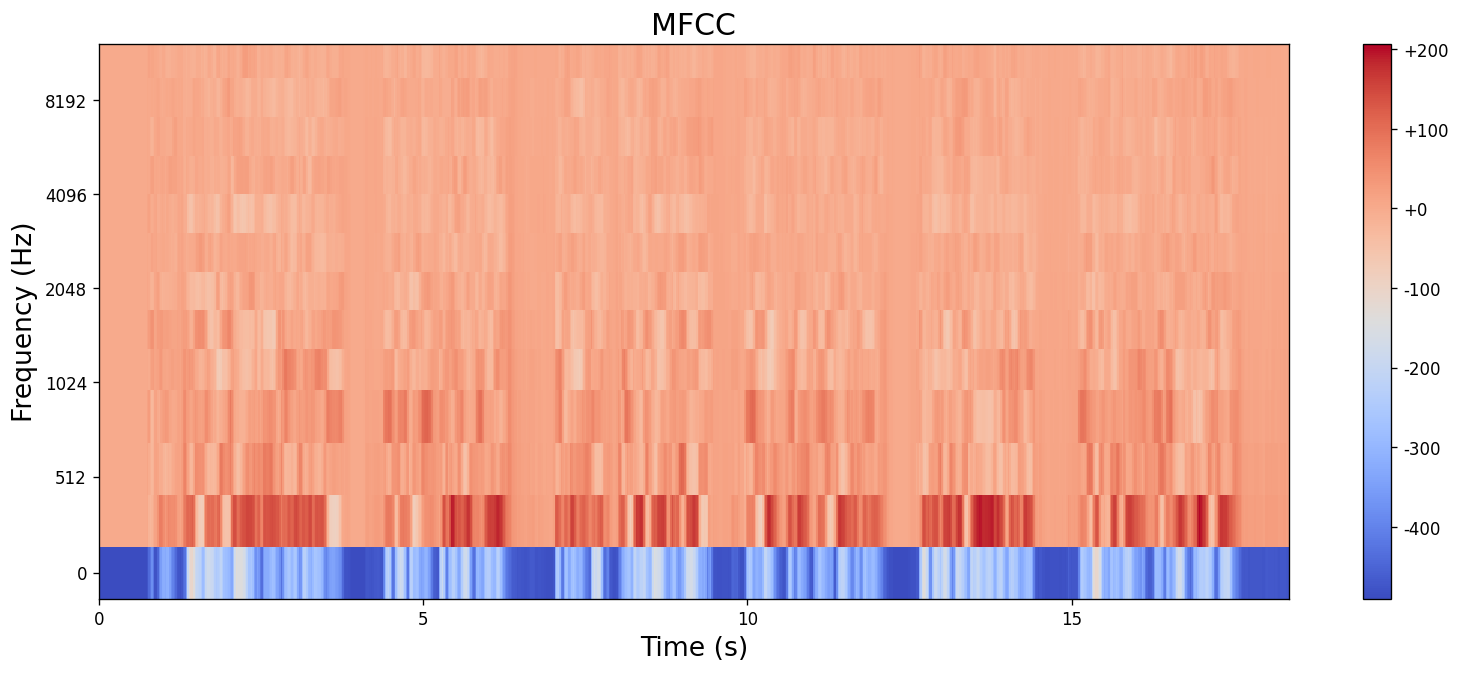

In [5]:
# calculate mfccs
N_MFCC = 13
mfccs = librosa.feature.mfcc(y=audio, n_mfcc=N_MFCC, sr=sr)

fig = plt.figure(figsize=(16, 6), dpi=120)
plt.title('MFCC', fontsize=18)
librosa.display.specshow(
    mfccs,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
fig.gca().set_xlabel("Time (s)", fontsize=16)
fig.gca().set_ylabel("Frequency (Hz)", fontsize=16)
plt.colorbar(format='%+2.0f')
plt.show()

## Дельта и дельта-дельта MFCC

Обычные MFCC-коэффициенты дают информацию об одном конкретном фрейме сигнала, но не располагают информацией о изменениях в сигнале с течением времени. Чтобы проанализировать характеристики сигнала в динамике, часто используют *дельта мел-кепстральные коэффициенты* и *дельта-дельта мел-кепстральные коэффициенты*, определяемые, как первые и вторые разности между коэффициентами.

Таким образом, для коэффициента $c_t$ в момент времени $t$ соответствующий дельта-коэффициент считается следующим образом:

$$\Delta_t = c_t - c_{t-1} \tag{14.7}$$

$$\Delta\Delta_t = \Delta_t - \Delta_{t - 1} \tag{14.8}$$

Дельта и дельта-дельта коэффициенты можно рассматривать как грубую аппроксимацию первой и второй производной обычных мел-кепстральных коэффициентов.

Визуализируем эти коэффициенты с помощью метода `feature.delta`.

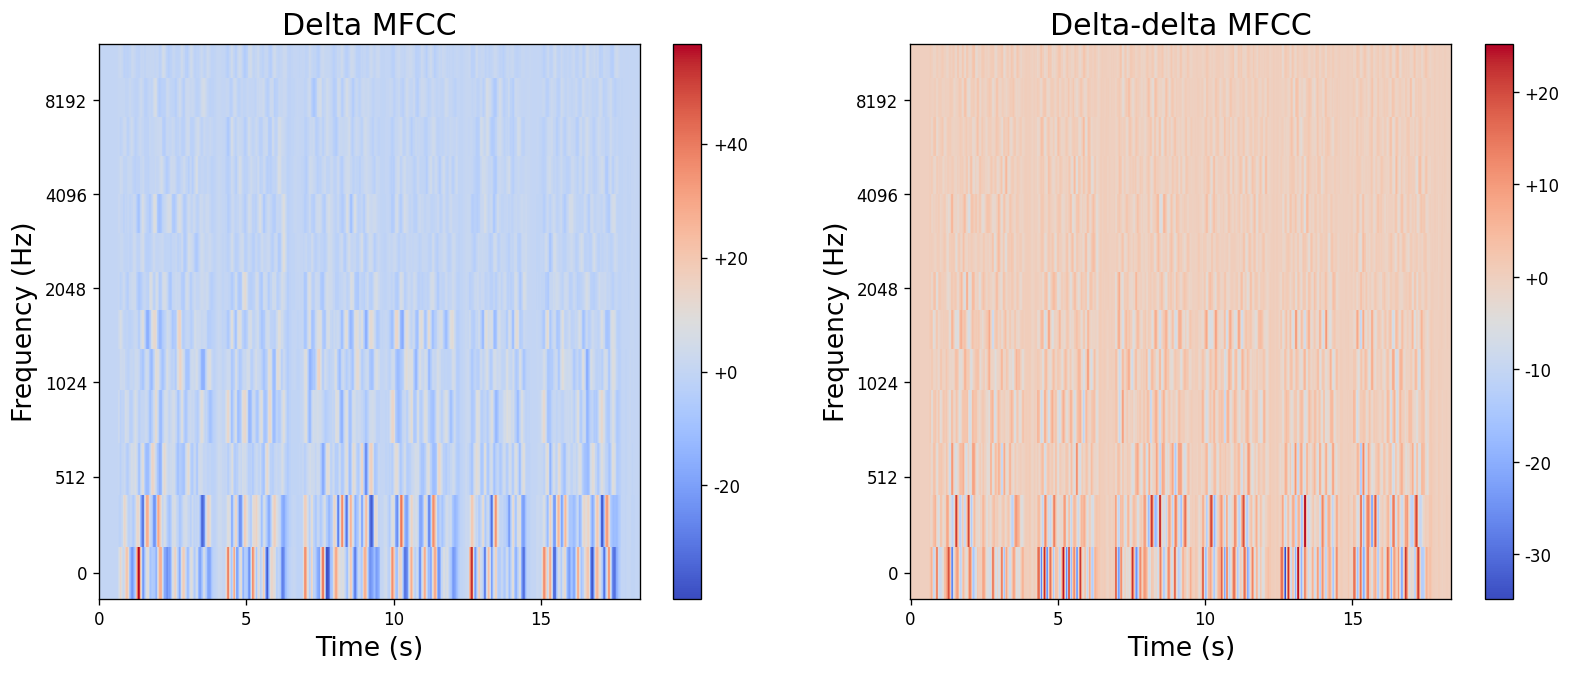

In [6]:
# Compute delta coefficients
delta_mfccs = librosa.feature.delta(mfccs)

# Compute delta-delta coefficients
delta2_mfccs = librosa.feature.delta(mfccs, order=2)


fig = plt.figure(figsize=(16, 6), dpi=120)
plt.subplot(1, 2, 1)
plt.title('Delta MFCC', fontsize=18)
librosa.display.specshow(
    delta_mfccs,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
fig.gca().set_xlabel("Time (s)", fontsize=16)
fig.gca().set_ylabel("Frequency (Hz)", fontsize=16)
plt.colorbar(format='%+2.0f')

plt.subplot(1, 2, 2)
plt.title('Delta-delta MFCC', fontsize=18)
librosa.display.specshow(
    delta2_mfccs,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
fig.gca().set_xlabel("Time (s)", fontsize=16)
fig.gca().set_ylabel("Frequency (Hz)", fontsize=16)
plt.colorbar(format='%+2.0f')
plt.show()

Попробуем объединить все полученные коэффициенты. Тогда у каждого фрейма сигнала будет суммарно 39 соответствующих коэффициентов.

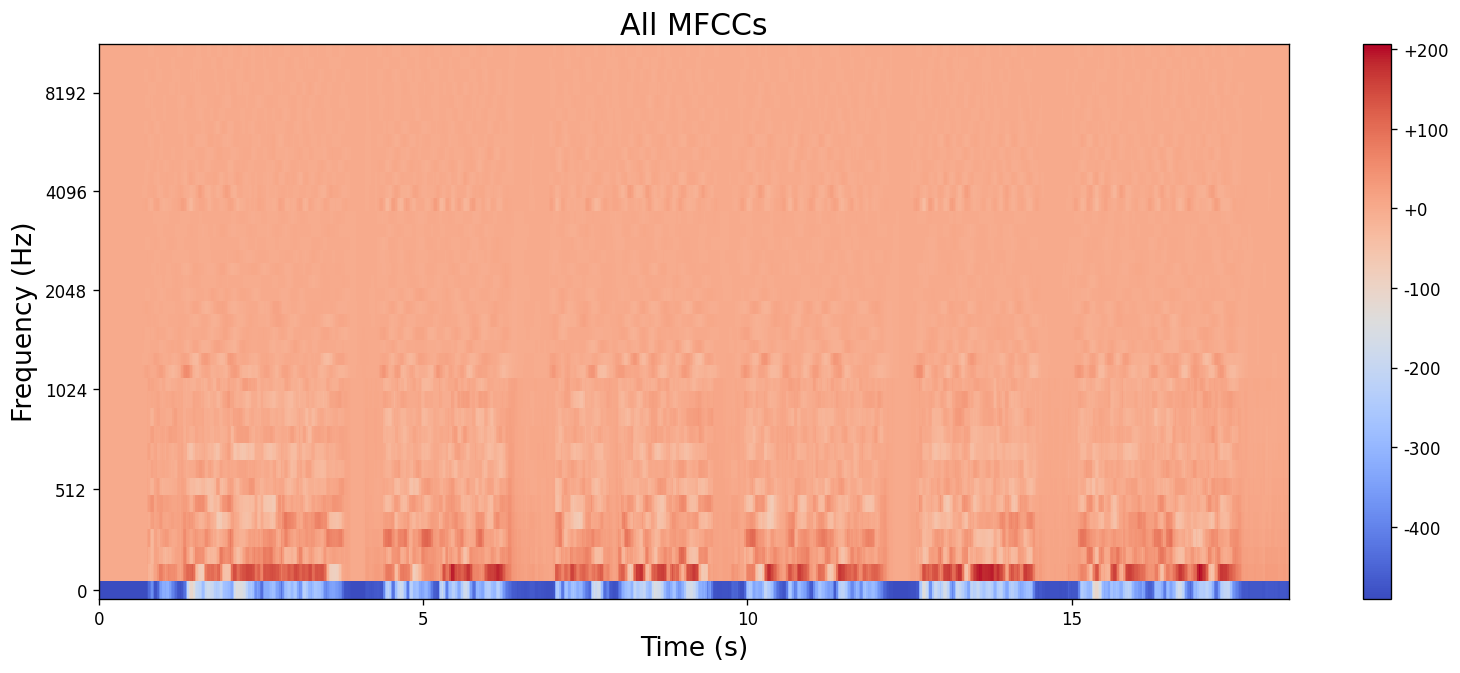

In [7]:
# Concatenate mfccs
full_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
fig = plt.figure(figsize=(16, 6), dpi=120)
plt.title('All MFCCs', fontsize=18)
librosa.display.specshow(
    full_mfccs,
    x_axis='time',
    y_axis='mel',
    sr=sr
)
fig.gca().set_xlabel("Time (s)", fontsize=16)
fig.gca().set_ylabel("Frequency (Hz)", fontsize=16)
plt.colorbar(format='%+2.0f')
plt.show()

Долгое время, до распространения нейросетей, мел-кепстральные коэффициенты были самым часто используемым способом представления речевых сигналов. Однако несмотря на все преимущества, у мел-кепстральных коэффициентов также есть некоторые ограничения:
1. Низкая устойчивость к шуму. Если на записи речи присутствуют фоновые шумы, мел-кепстральные коэффициенты покажут гораздо менее информативный результат. Поэтому перед их извлечением рекомендуется очистить запись от шума.


2. Несмотря на то, что мел-кепстральные коэффициенты отлично подходят для анализа речи, практический опыт показал, что они гораздо менее эффективны для задач синтеза речи.

____